In [4]:
import tensorflow as tf
import os
import pathlib
import time
import datetime
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
import os
import json
import cv2
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
import random
import re
import os
import shutil
from sklearn.model_selection import train_test_split

import tensorflow as tf

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display


In [5]:
WIDTH = HEIGHT = 2048
BATCH_SIZE = 1

In [6]:
anger_directory = r"/Users/joeljohnson/pix2pix/warped_anger"
neutral_directory = r"/Users/joeljohnson/pix2pix/warped_neutral"

anger_files_full = os.listdir(anger_directory)
neutral_files_full = os.listdir(neutral_directory)

def extract_number_from_filename(filename):
    return int(''.join([c for c in filename if c.isdigit()]))

# Filter out files that don't end with ".png"
anger_files_full = [f for f in anger_files_full if f.endswith(".png")]
neutral_files_full = [f for f in neutral_files_full if f.endswith(".png")]

# Sort files based on extracted numbers
sorted_anger_files = sorted(anger_files_full, key=extract_number_from_filename)
sorted_neutral_files = sorted(neutral_files_full, key=extract_number_from_filename)

print("Sorted Anger Files:", sorted_anger_files)
print("Sorted Neutral Files:", sorted_neutral_files)

#load images into arrays
train_x = []
train_y = []
test_x = []
test_y = []
# def load(path):
    
for x,y in zip(sorted_neutral_files, sorted_anger_files):
    x = os.path.join(neutral_directory,x)
    y = os.path.join(anger_directory, y)
    print(f"x {x}")
    print(f"y {y}")
    # Load image
    # img_anger = cv2.imread(anger_path, cv2.IMREAD_COLOR)
    x = cv2.imread(x, cv2.IMREAD_COLOR)
    y = cv2.imread(y, cv2.IMREAD_COLOR)
    # Convert image to RGB
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)
    # Resize image
    # img_anger = cv2.resize(img_anger, (WIDTH, HEIGHT))
    x = cv2.resize(x, (WIDTH, HEIGHT))
    y = cv2.resize(x, (WIDTH, HEIGHT))

    x = np.asarray(x)
    y = np.asarray(y)
    x = tf.cast(x, tf.float32)
    y = tf.cast(y, tf.float32)
    train_x.append(x)
    train_y.append(y)




Sorted Anger Files: ['1anger.png', '2anger.png', '3anger.png', '4anger.png', '5anger.png', '6anger.png', '7anger.png', '8anger.png', '9anger.png', '10anger.png', '11anger.png', '12anger.png', '13anger.png', '14anger.png', '15anger.png', '16anger.png', '17anger.png', '18anger.png', '19anger.png', '20anger.png', '21anger.png', '22anger.png', '23anger.png', '24anger.png', '25anger.png', '26anger.png', '27anger.png', '28anger.png', '29anger.png', '30anger.png', '31anger.png', '32anger.png', '33anger.png', '34anger.png', '35anger.png', '36anger.png', '37anger.png', '38anger.png', '39anger.png', '40anger.png', '41anger.png', '42anger.png', '43anger.png', '44anger.png', '45anger.png', '46anger.png', '47anger.png', '48anger.png', '49anger.png', '50anger.png', '51anger.png', '52anger.png', '53anger.png', '54anger.png', '55anger.png', '56anger.png', '57anger.png', '58anger.png', '59anger.png', '60anger.png', '61anger.png', '62anger.png', '63anger.png', '64anger.png', '65anger.png', '66anger.png'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


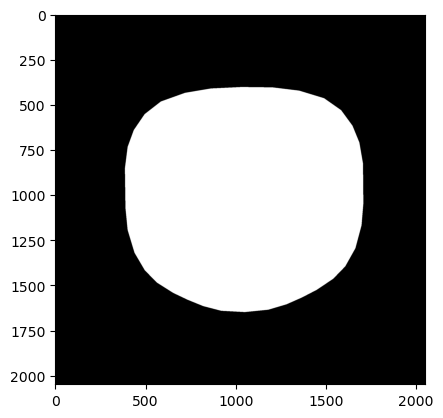

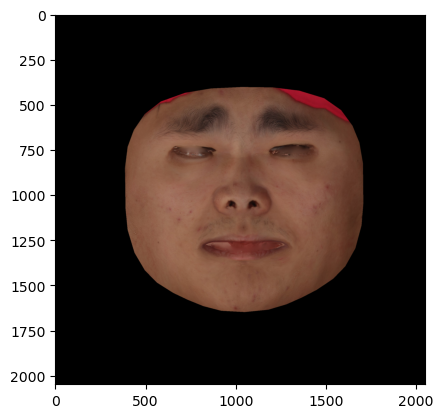

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test size: 90


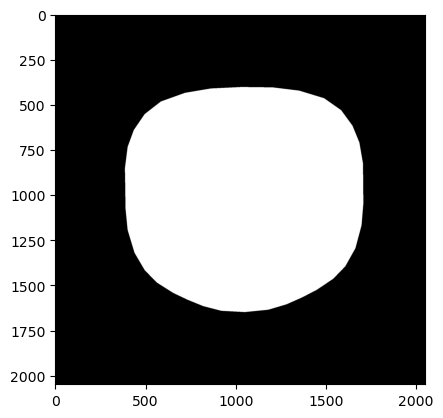

In [7]:
plt.imshow(train_x[0])
plt.show()
# Normalizing the images to [-1, 1]
def normalize(image):
  normalized = (image / 127.5) - 1
  return normalized

def denormalize(image):
    denormalized = (image+1)*127.5
    return denormalized


x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=42, shuffle=True)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = x_train.astype('float32') 
y_train = y_train.astype('float32')
x_test = x_test.astype('float32') 
y_test = y_test.astype('float32')
plt.imshow(x_train[0]/255.0)
plt.show()
x_train = normalize(x_train)
y_train = normalize(y_train)
x_test = normalize(x_test)
y_test = normalize(y_test)
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
print(f"test size: {len(x_train)}")
x_train.shape

plt.imshow(denormalize(x_train[0]))
plt.show()

In [8]:
# The facade training set consist of 400 images
BUFFER_SIZE = len(x_train) - len(x_test)
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 256x256 in size
IMG_WIDTH = 2048
IMG_HEIGHT = 2048

OUTPUT_CHANNELS = 3

In [9]:


def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

down_model = downsample(3, 4)
# down_result = down_model(tf.expand_dims(x_train, 0))
down_result = down_model(x_train)
print (down_result.shape)

def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

(90, 1024, 1024, 3)
(90, 2048, 2048, 3)


In [10]:
def Generator():
    inputs = tf.keras.layers.Input(shape=[2048, 2048, 3])

    down_stack = [
        downsample(64, 4, apply_batchnorm=False),  # 1024x1024
        downsample(128, 4),  # 512x512
        downsample(256, 4),  # 256x256
        downsample(512, 4),  # 128x128
        downsample(512, 4),  # 64x64
        downsample(512, 4),  # 32x32
        downsample(512, 4),  # 16x16
        downsample(512, 4),  # 8x8
        downsample(512, 4),  # 4x4
        downsample(512, 4),  # 2x2
        downsample(512, 4)  # 1x1
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True),  # 2x2
        upsample(512, 4, apply_dropout=True),  # 4x4
        upsample(512, 4, apply_dropout=True),  # 8x8
        upsample(512, 4, apply_dropout=True),  # 16x16
        upsample(512, 4),  # 32x32
        upsample(512, 4),  # 64x64
        upsample(512, 4),  # 128x128
        upsample(256, 4),  # 256x256
        upsample(128, 4),  # 512x512
        upsample(64, 4),  # 1024x1024
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                           strides=2,
                                           padding='same',
                                           kernel_initializer=initializer,
                                           activation='tanh')  # 2048x2048

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)


In [11]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


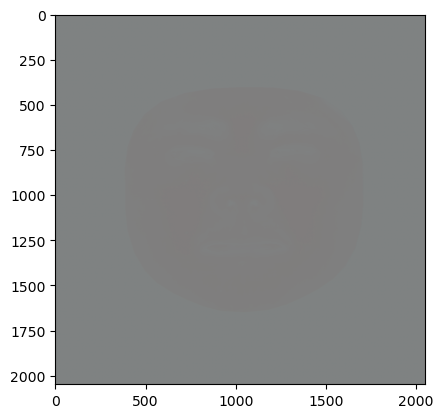

In [12]:
gen_input = tf.expand_dims(x_train[3,:,:,:], 0)
gen_output = generator(gen_input, training=False)
gen_output_np = gen_output[0, ...].numpy()
gen_output_np = denormalize(gen_output_np)
plt.imshow(gen_output_np.astype(np.uint8))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


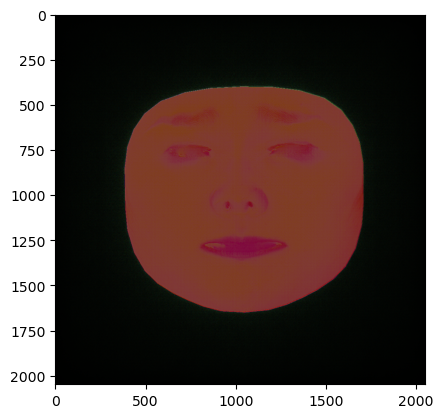

In [13]:
gen_output = generator(train_x[0][tf.newaxis, ...], training=False)
plt.imshow(gen_output[0, ...])

In [14]:
LAMBDA = 100

In [15]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [16]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

In [17]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[2048, 2048, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[2048, 2048, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

In [18]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


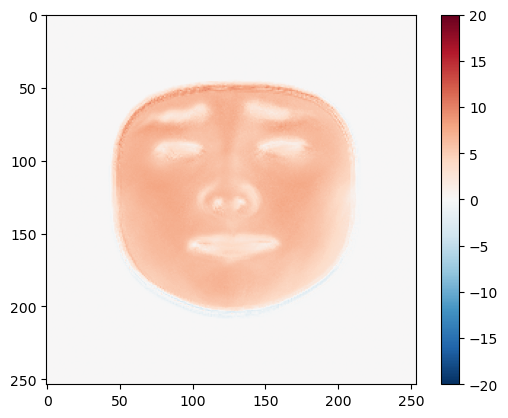

In [19]:
inp = train_x[0]
real = train_y[0]
disc_out = discriminator([inp[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()

In [20]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [21]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [22]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [23]:


def generate_images(model, test_input, tar, save=False):
    # Check and expand dimensions if necessary
    if len(test_input.shape) == 3:
        test_input = tf.expand_dims(test_input, axis=0)
    if len(tar.shape) == 3:
        tar = tf.expand_dims(tar, axis=0)

    # Get the model's prediction
    prediction = model(test_input, training=True)

    # Visualization
    plt.figure(figsize=(15, 5))
    
    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # Displaying the images, assuming they are in the range [-1, 1]
        # Convert them to [0, 1] for visualization
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    if save:
        plt.


    

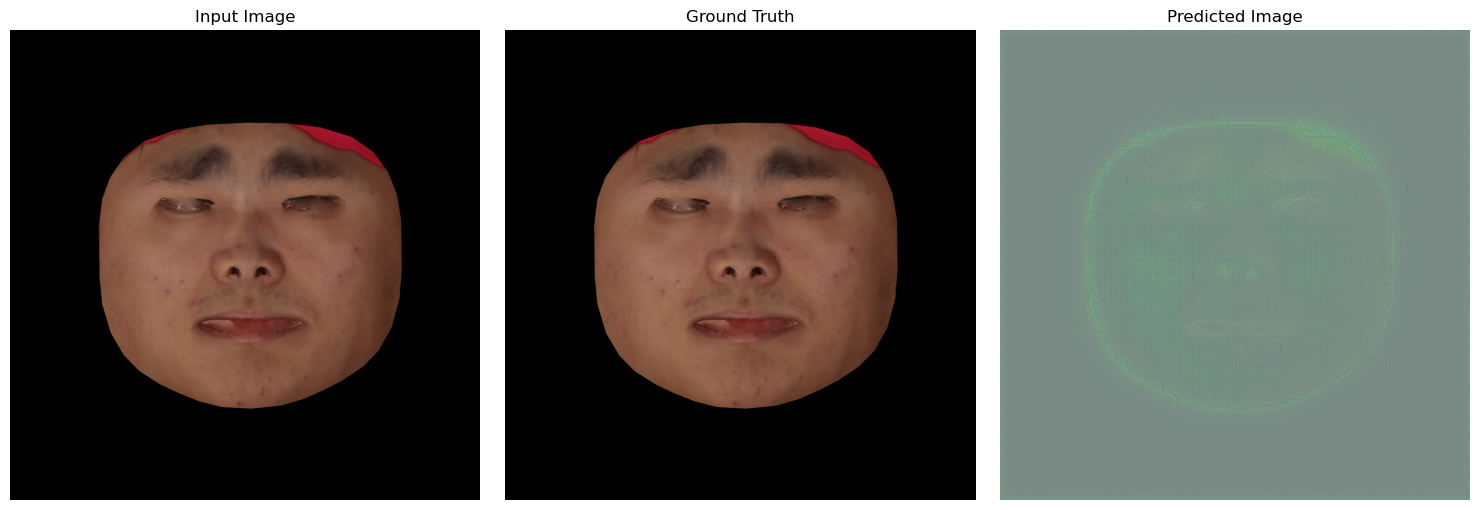

In [24]:

generate_images(generator, x_train[0][tf.newaxis, ...], y_train[0][tf.newaxis, ...])

In [25]:
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [26]:
@tf.function
def train_step(input_image, target, step):
    # Ensure the input image has a batch dimension
  if len(input_image.shape) == 3:
      input_image = tf.expand_dims(input_image, axis=0)

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      gen_output = generator(input_image, training=True)
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
    tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

In [31]:

def fit(train_ds, test_ds, steps):
  example_input, example_target = next(iter(test_ds.take(1)))
  start = time.time()

  for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
    
    if (step) % 10 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input, example_target)
      
      

    train_step(input_image, target, step)

    # Training step
    if (step+1) % 10 == 0:
      print('.', end='', flush=True)


    # Save (checkpoint) the model every 5k steps
    if (step + 1) % 10 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

In [28]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

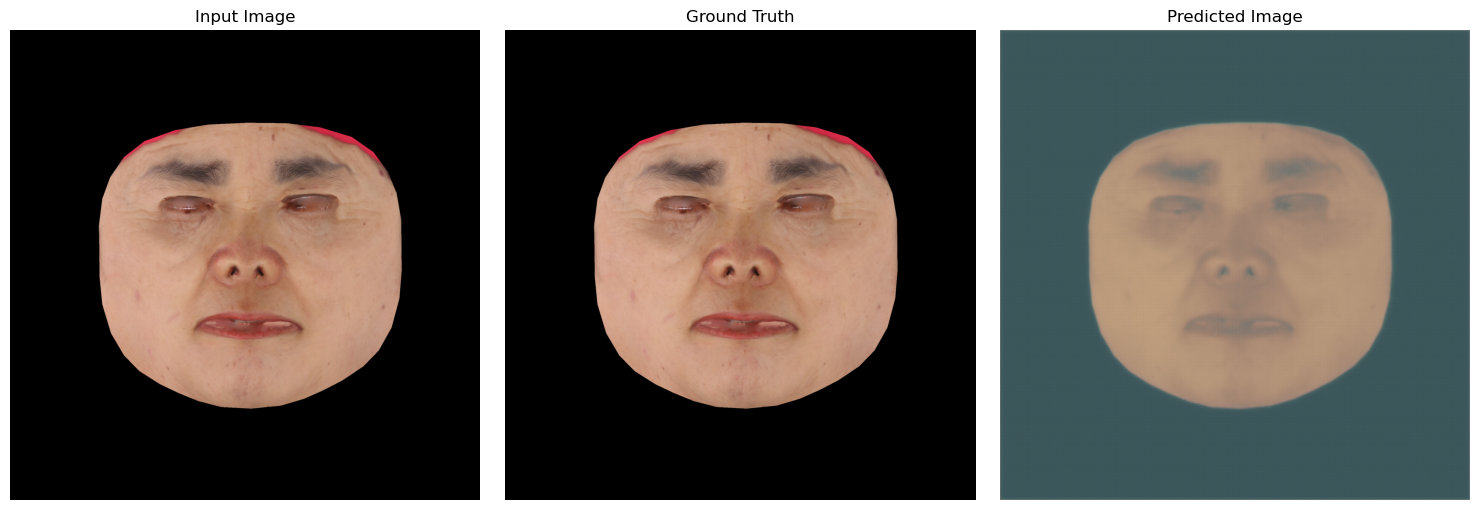

Step: 0k
..........

In [32]:
# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
fit(train_dataset, test_dataset, steps=100)

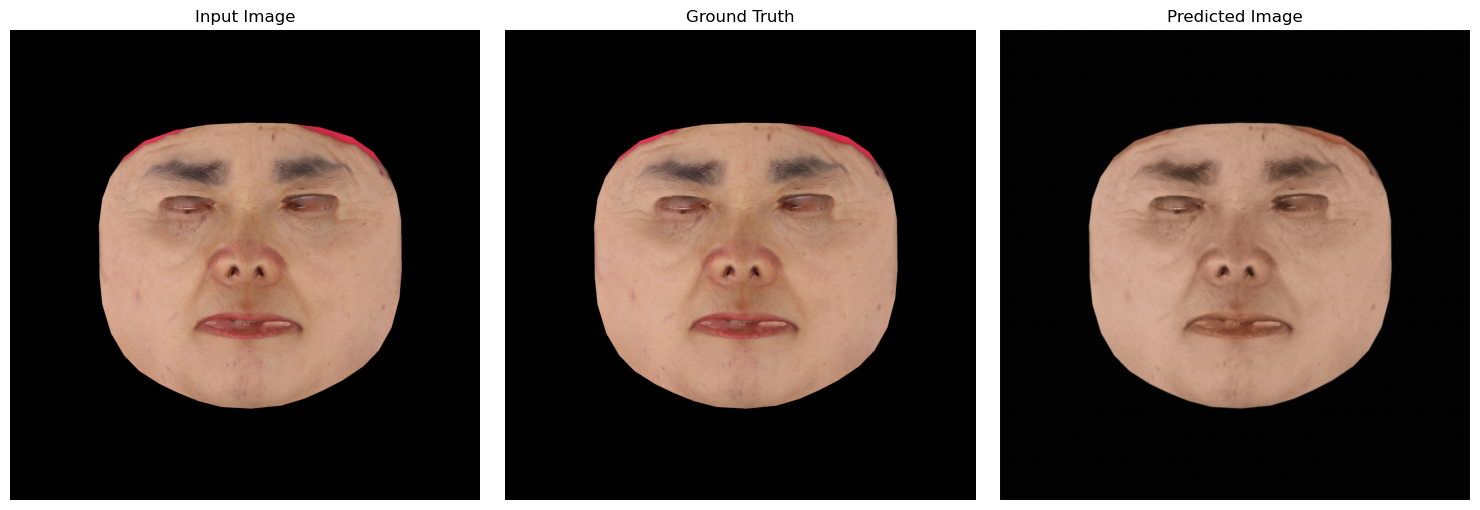

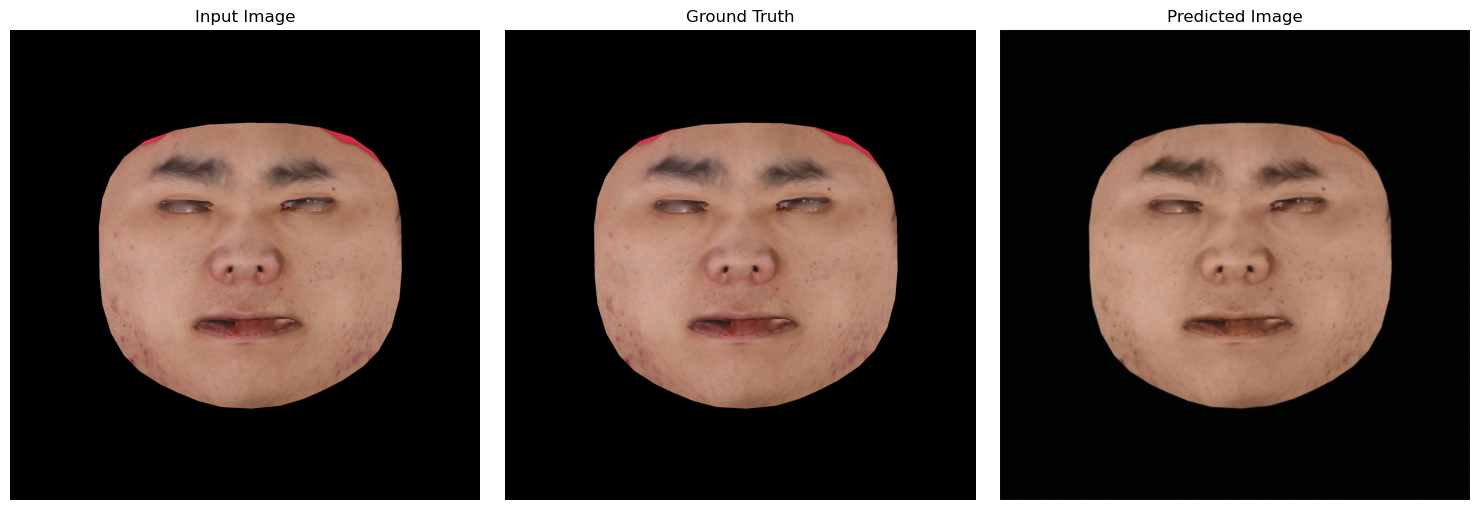

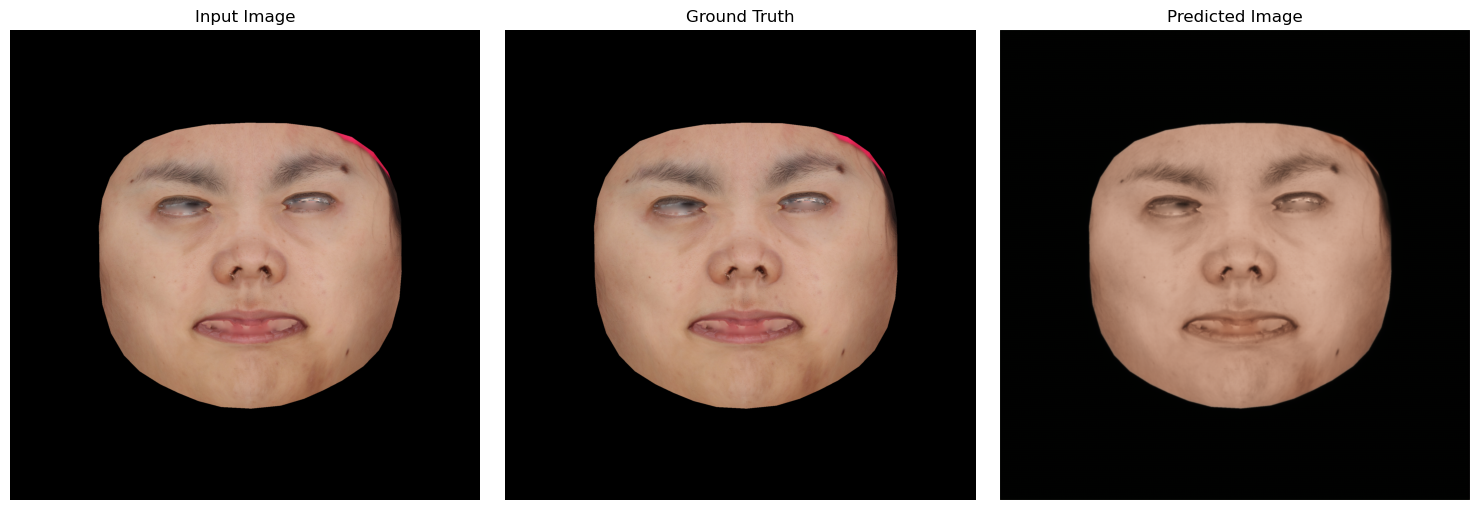

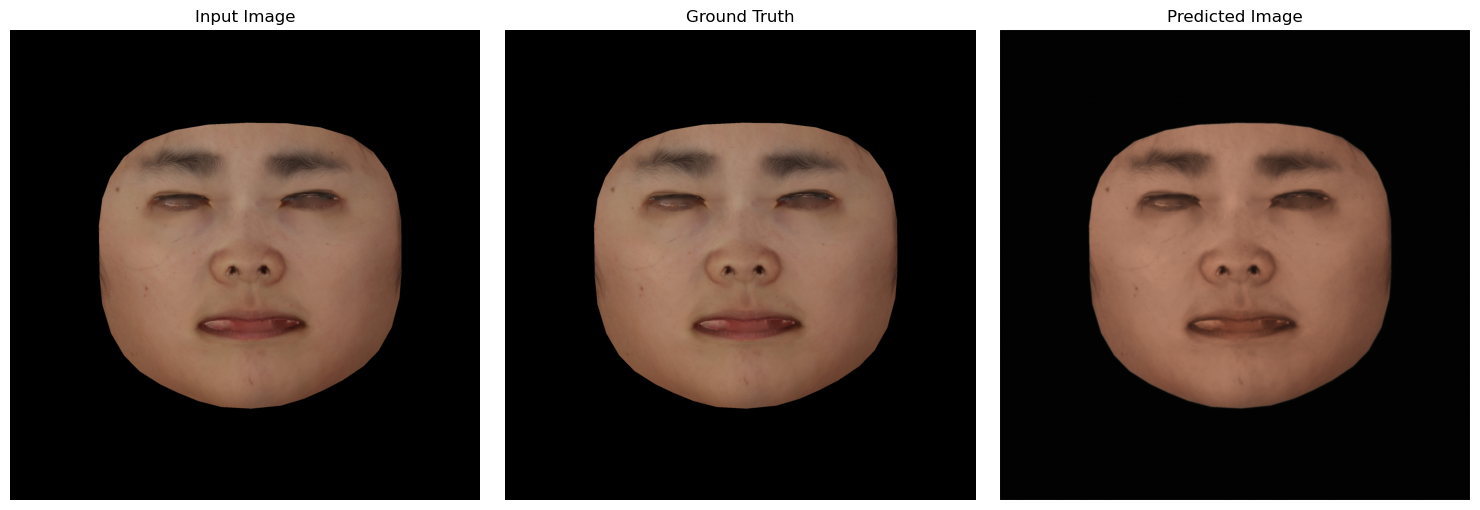

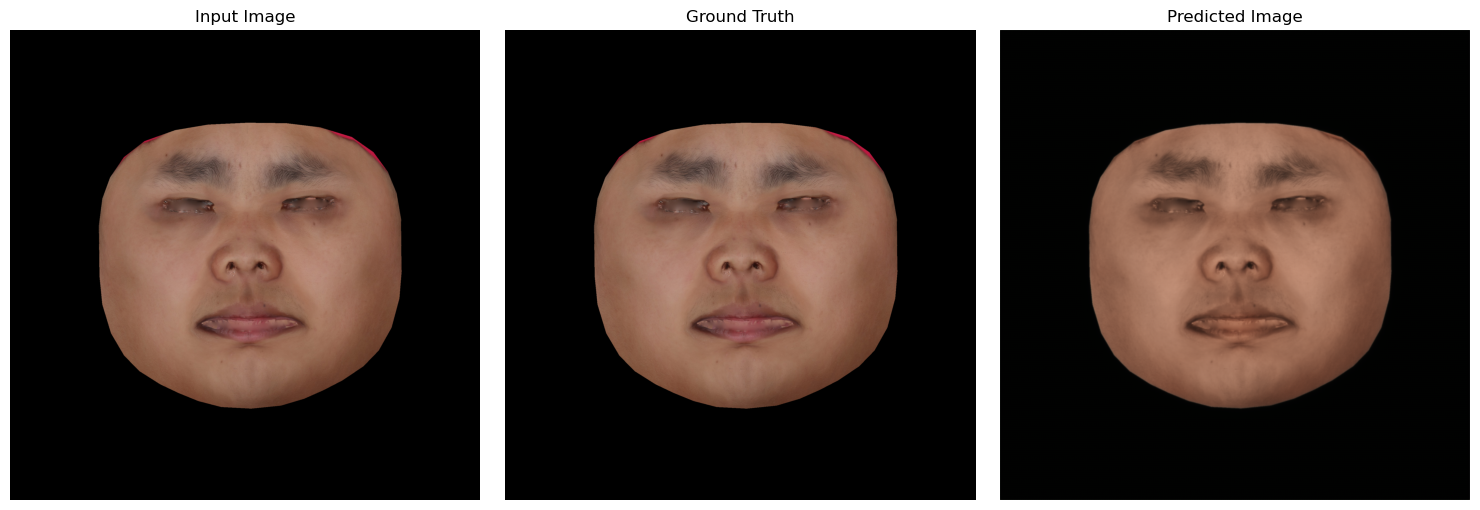

In [33]:
for inp, tar in test_dataset.take(5):
  generate_images(generator, inp, tar)

In [34]:
#save model
generator.save('pix2pix')

INFO:tensorflow:Assets written to: pix2pix/assets


INFO:tensorflow:Assets written to: pix2pix/assets


In [35]:
#load model
new_model = tf.keras.models.load_model("pix2pix")

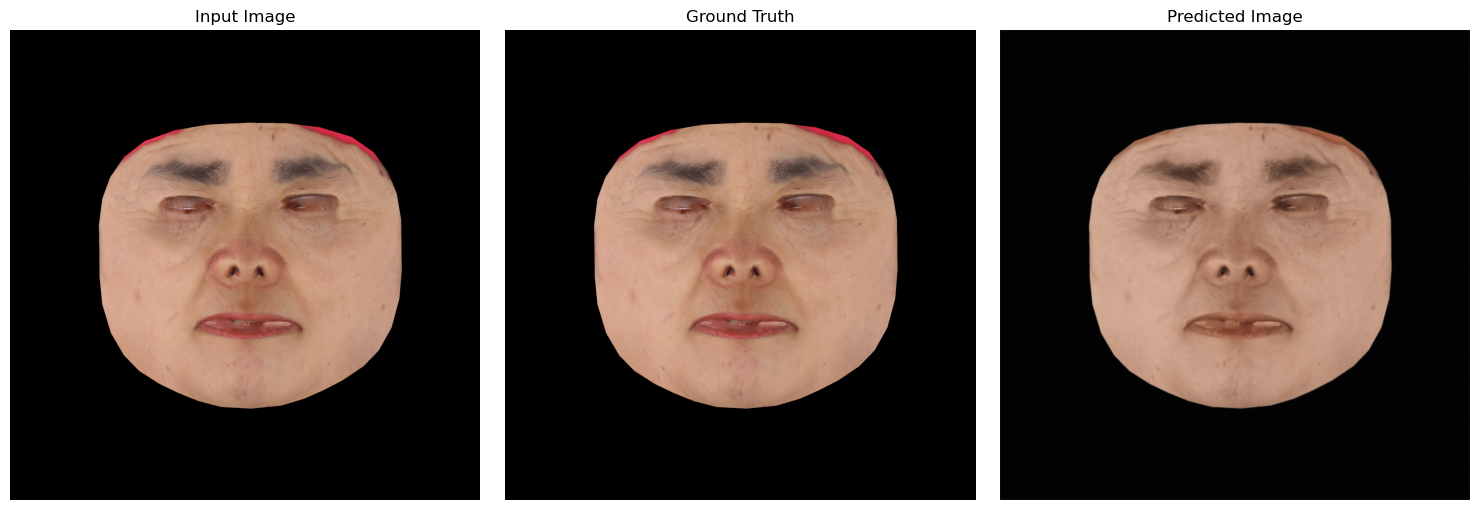

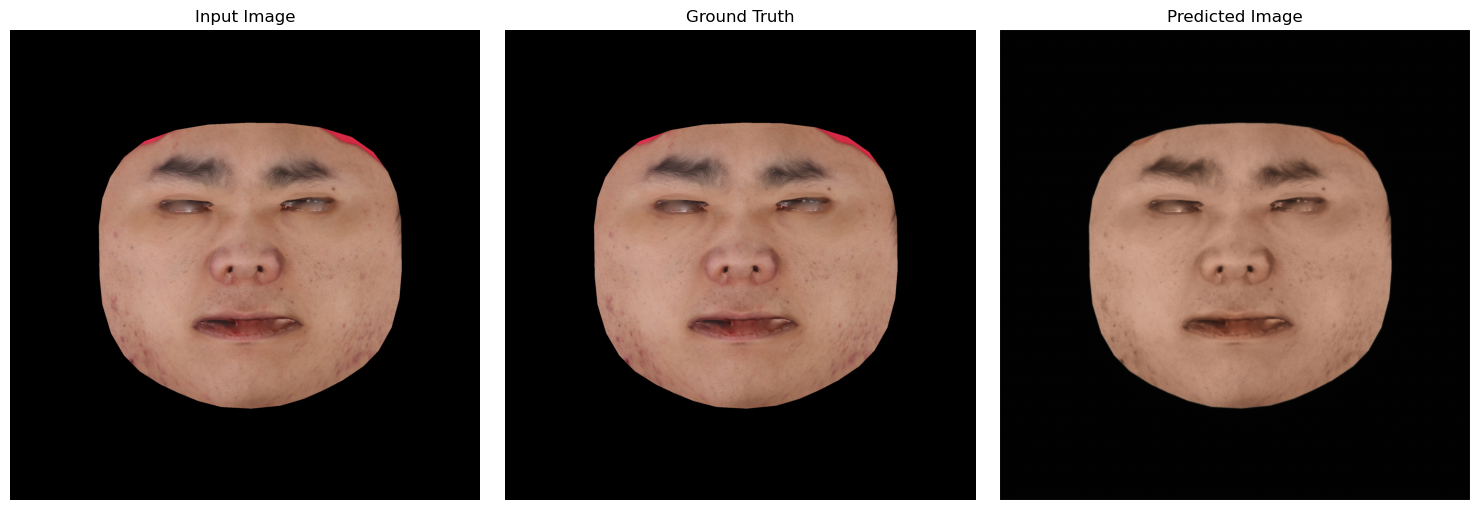

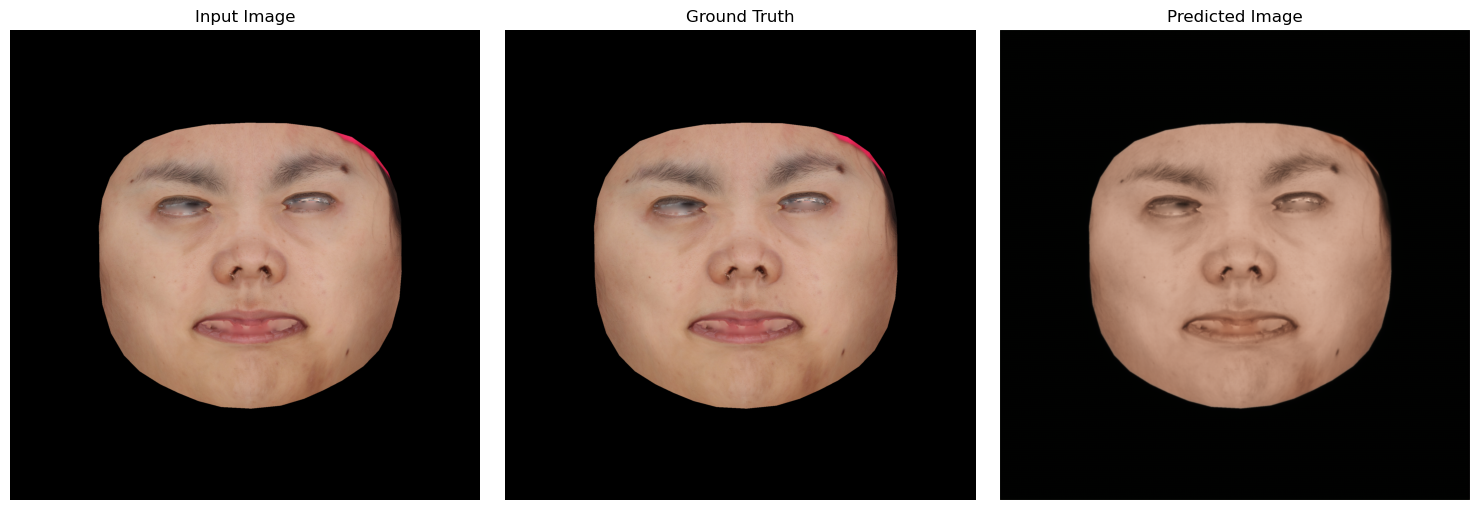

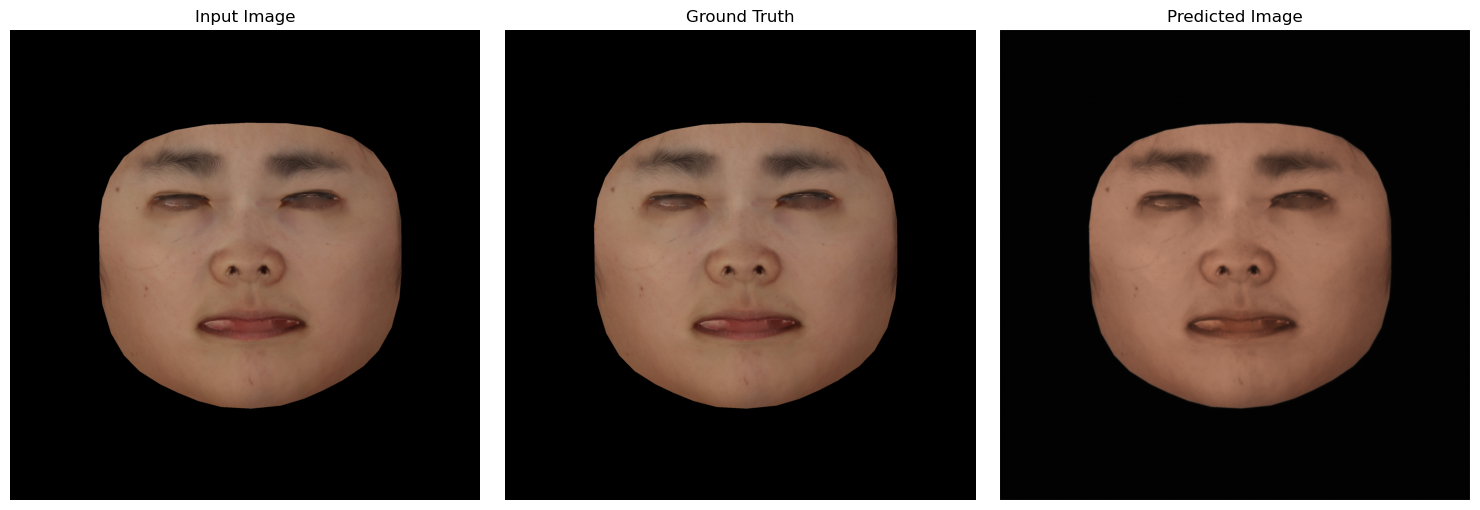

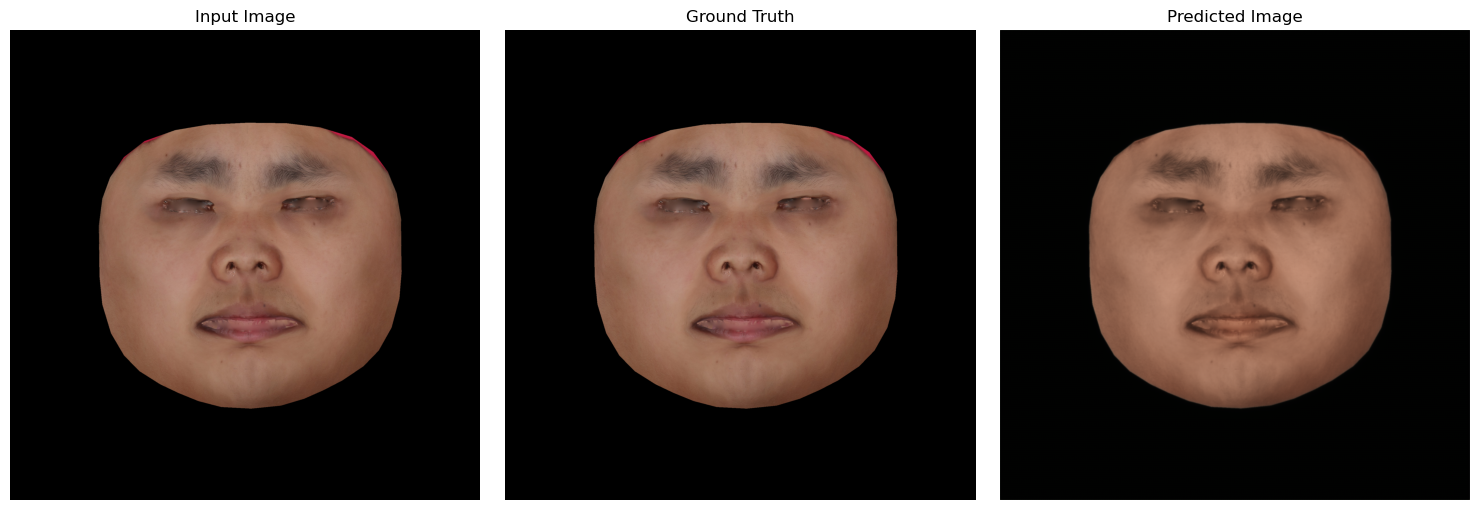

In [36]:
for inp, tar in test_dataset.take(5):
    generate_images(new_model, inp, tar)